In [1]:
# June 2022
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def readucr(filename):
    data = np.loadtxt(filename, delimiter="\t")
    y = data[:, 0]
    x = data[:, 1:]
    return x, y.astype(int)


root_url = "https://raw.githubusercontent.com/hfawaz/cd-diagram/master/FordA/"

x_train, y_train = readucr(root_url + "FordA_TRAIN.tsv")
x_test, y_test = readucr(root_url + "FordA_TEST.tsv")

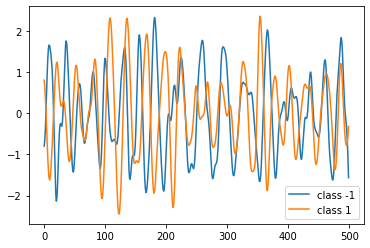

In [3]:
classes = np.unique(np.concatenate((y_train, y_test), axis=0))

plt.figure()
for c in classes:
    c_x_train = x_train[y_train == c]
    plt.plot(c_x_train[0], label="class " + str(c))
plt.legend(loc="best")
plt.show()
plt.close()

In [5]:
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))

In [7]:
num_classes = len(np.unique(y_train))

In [8]:
idx = np.random.permutation(len(x_train))
x_train = x_train[idx]
y_train = y_train[idx]

In [9]:
y_train[y_train == -1] = 0
y_test[y_test == -1] = 0

In [10]:
def make_model(input_shape):
    input_layer = keras.layers.Input(input_shape)

    conv1 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(input_layer)
    conv1 = keras.layers.BatchNormalization()(conv1)
    conv1 = keras.layers.ReLU()(conv1)

    conv2 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv1)
    conv2 = keras.layers.BatchNormalization()(conv2)
    conv2 = keras.layers.ReLU()(conv2)

    conv3 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv2)
    conv3 = keras.layers.BatchNormalization()(conv3)
    conv3 = keras.layers.ReLU()(conv3)

    gap = keras.layers.GlobalAveragePooling1D()(conv3)

    output_layer = keras.layers.Dense(num_classes, activation="softmax")(gap)

    return keras.models.Model(inputs=input_layer, outputs=output_layer)


model = make_model(input_shape=x_train.shape[1:])

In [11]:
epochs = 100
batch_size = 128

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)
history = model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.2,
    verbose=1,
)

Epoch 1/100
23/23 [==============================] - 14s 29ms/step - loss: 0.7033 - sparse_categorical_accuracy: 0.5983 - val_loss: 0.6948 - val_sparse_categorical_accuracy: 0.4813 - lr: 0.0010
Epoch 2/100
23/23 [==============================] - 0s 13ms/step - loss: 0.5647 - sparse_categorical_accuracy: 0.7212 - val_loss: 0.7098 - val_sparse_categorical_accuracy: 0.4813 - lr: 0.0010
Epoch 3/100
23/23 [==============================] - 0s 12ms/step - loss: 0.4981 - sparse_categorical_accuracy: 0.7517 - val_loss: 0.7315 - val_sparse_categorical_accuracy: 0.4813 - lr: 0.0010
Epoch 4/100
23/23 [==============================] - 0s 13ms/step - loss: 0.4709 - sparse_categorical_accuracy: 0.7573 - val_loss: 0.7590 - val_sparse_categorical_accuracy: 0.4813 - lr: 0.0010
Epoch 5/100
23/23 [==============================] - 0s 13ms/step - loss: 0.4460 - sparse_categorical_accuracy: 0.7840 - val_loss: 0.7906 - val_sparse_categorical_accuracy: 0.4813 - lr: 0.0010
Epoch 6/100
23/23 [===============

23/23 [==============================] - 0s 12ms/step - loss: 0.2859 - sparse_categorical_accuracy: 0.8938 - val_loss: 0.7270 - val_sparse_categorical_accuracy: 0.7129 - lr: 0.0010
Epoch 44/100
23/23 [==============================] - 0s 12ms/step - loss: 0.2718 - sparse_categorical_accuracy: 0.8962 - val_loss: 1.3433 - val_sparse_categorical_accuracy: 0.6865 - lr: 0.0010
Epoch 45/100
23/23 [==============================] - 0s 12ms/step - loss: 0.2835 - sparse_categorical_accuracy: 0.8868 - val_loss: 2.3015 - val_sparse_categorical_accuracy: 0.6019 - lr: 0.0010
Epoch 46/100
23/23 [==============================] - 0s 12ms/step - loss: 0.2775 - sparse_categorical_accuracy: 0.8858 - val_loss: 1.5322 - val_sparse_categorical_accuracy: 0.6546 - lr: 0.0010
Epoch 47/100
23/23 [==============================] - 0s 12ms/step - loss: 0.2869 - sparse_categorical_accuracy: 0.8750 - val_loss: 1.8778 - val_sparse_categorical_accuracy: 0.6546 - lr: 0.0010
Epoch 48/100
23/23 [=======================

23/23 [==============================] - 0s 12ms/step - loss: 0.2193 - sparse_categorical_accuracy: 0.9122 - val_loss: 2.2871 - val_sparse_categorical_accuracy: 0.5173 - lr: 5.0000e-04
Epoch 86/100
23/23 [==============================] - 0s 12ms/step - loss: 0.2122 - sparse_categorical_accuracy: 0.9139 - val_loss: 2.0003 - val_sparse_categorical_accuracy: 0.5243 - lr: 5.0000e-04
Epoch 87/100
23/23 [==============================] - 0s 12ms/step - loss: 0.2150 - sparse_categorical_accuracy: 0.9160 - val_loss: 1.5363 - val_sparse_categorical_accuracy: 0.5409 - lr: 5.0000e-04
Epoch 88/100
23/23 [==============================] - 0s 13ms/step - loss: 0.2140 - sparse_categorical_accuracy: 0.9160 - val_loss: 0.2034 - val_sparse_categorical_accuracy: 0.9196 - lr: 5.0000e-04
Epoch 89/100
23/23 [==============================] - 0s 12ms/step - loss: 0.2103 - sparse_categorical_accuracy: 0.9174 - val_loss: 0.3386 - val_sparse_categorical_accuracy: 0.8308 - lr: 5.0000e-04
Epoch 90/100
23/23 [===

In [12]:
model = keras.models.load_model("best_model.h5")

test_loss, test_acc = model.evaluate(x_train, y_train)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

113/113 [==============================] - 0s 2ms/step - loss: 0.2099 - sparse_categorical_accuracy: 0.9164
Test accuracy 0.9164121150970459
Test loss 0.209928497672081


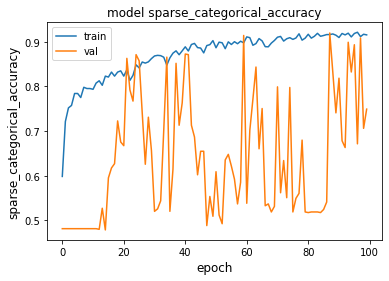

In [13]:
metric = "sparse_categorical_accuracy"
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
plt.title("model " + metric)
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()